In [14]:
import pandas as pd
import numpy as np

In [27]:
nb_breeds = 10
n_clusters = 1000
random_state = 42
results_path = '../'

In [34]:
y_train = np.load(results_path + 'y_train_' + str(nb_breeds) + '_breeds.npy')
y_test = np.load(results_path + 'y_test_' + str(nb_breeds) + '_breeds.npy')


X_train = pd.read_csv(results_path + 'BOVW_train_' + str(nb_breeds) + '_breeds_' + str(n_clusters) + '_clusters.csv')
X_test = pd.read_csv(results_path + 'BOVW_test_' + str(nb_breeds) + '_breeds_' + str(n_clusters) + '_clusters.csv')

In [40]:
X_test.head()

,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,breed
0,0.0,9.0,0.0,1.0,1.0,2.0,3.0,4.0,0.0,2.0,...,0.0,2.0,1.0,9.0,0.0,2.0,0.0,1.0,2.0,Saluki
1,0.0,1.0,2.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,...,2.0,2.0,3.0,2.0,2.0,0.0,0.0,2.0,1.0,Saluki
2,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,Saluki
3,1.0,1.0,0.0,6.0,0.0,2.0,4.0,2.0,1.0,0.0,...,4.0,3.0,0.0,4.0,2.0,0.0,0.0,1.0,2.0,Saluki
4,1.0,0.0,1.0,9.0,2.0,1.0,0.0,3.0,3.0,1.0,...,2.0,0.0,0.0,4.0,1.0,2.0,0.0,2.0,3.0,Saluki


In [42]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()

y_train_enc = enc.fit_transform(X_train['breed'])
y_test_enc = enc.transform(X_test['breed'])

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators':[10,100,1000], 'max_depth':[10,50,100]}
rdf = RandomForestClassifier(random_state=0)
clf = GridSearchCV(rdf, parameters, cv=5, verbose=10)
clf.fit(X_train.drop(columns=['breed']), y_train_enc)

#rdf = RandomForestClassifier(n_estimators=100, max_depth=50,random_state=0)


y_pred = clf.predict(X_test.drop(columns=['breed']))
# save the model to disk

import pickle
filename = results_path + 'rdf_' + str(nb_breeds) + '_breeds_' + str(n_clusters) + '_clusters.sav'
pickle.dump(rdf, open(filename, 'wb'))

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] max_depth=10, n_estimators=10 ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=10, n_estimators=10, score=0.18779342723004694, total=   0.0s
[CV] max_depth=10, n_estimators=10 ...................................
[CV]  max_depth=10, n_estimators=10, score=0.1722488038277512, total=   0.0s
[CV] max_depth=10, n_estimators=10 ...................................
[CV]  max_depth=10, n_estimators=10, score=0.20772946859903382, total=   0.0s
[CV] max_depth=10, n_estimators=10 ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s


[CV]  max_depth=10, n_estimators=10, score=0.21256038647342995, total=   0.0s
[CV] max_depth=10, n_estimators=10 ...................................
[CV]  max_depth=10, n_estimators=10, score=0.21951219512195122, total=   0.0s
[CV] max_depth=10, n_estimators=100 ..................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.5s remaining:    0.0s


[CV]  max_depth=10, n_estimators=100, score=0.25821596244131456, total=   0.4s
[CV] max_depth=10, n_estimators=100 ..................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    1.0s remaining:    0.0s


[CV]  max_depth=10, n_estimators=100, score=0.27751196172248804, total=   0.6s
[CV] max_depth=10, n_estimators=100 ..................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    1.8s remaining:    0.0s


[CV]  max_depth=10, n_estimators=100, score=0.2898550724637681, total=   0.5s
[CV] max_depth=10, n_estimators=100 ..................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    2.4s remaining:    0.0s


[CV]  max_depth=10, n_estimators=100, score=0.28019323671497587, total=   0.6s
[CV] max_depth=10, n_estimators=100 ..................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    3.1s remaining:    0.0s


[CV]  max_depth=10, n_estimators=100, score=0.2926829268292683, total=   0.7s
[CV] max_depth=10, n_estimators=1000 .................................
[CV]  max_depth=10, n_estimators=1000, score=0.30985915492957744, total=   6.8s
[CV] max_depth=10, n_estimators=1000 .................................
[CV]  max_depth=10, n_estimators=1000, score=0.3014354066985646, total=   5.9s
[CV] max_depth=10, n_estimators=1000 .................................
[CV]  max_depth=10, n_estimators=1000, score=0.26570048309178745, total=   5.8s
[CV] max_depth=10, n_estimators=1000 .................................
[CV]  max_depth=10, n_estimators=1000, score=0.33816425120772947, total=   6.4s
[CV] max_depth=10, n_estimators=1000 .................................
[CV]  max_depth=10, n_estimators=1000, score=0.2975609756097561, total=   6.0s
[CV] max_depth=50, n_estimators=10 ...................................
[CV]  max_depth=50, n_estimators=10, score=0.22065727699530516, total=   0.0s
[CV] max_depth=50, n

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  2.2min finished
C:\Users\brigi\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


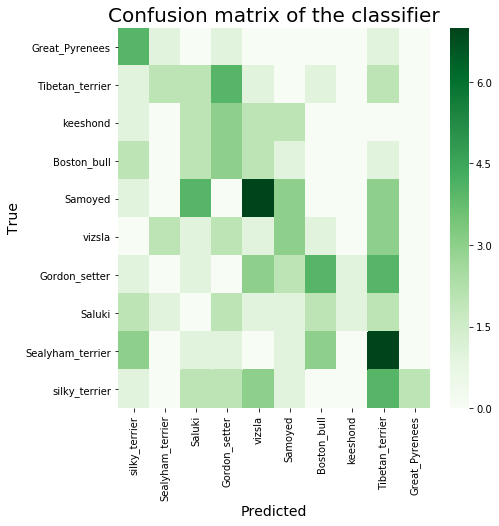

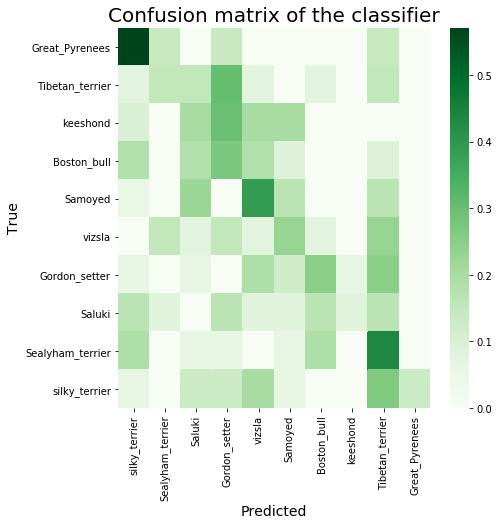

              precision    recall  f1-score   support

           0       0.25      0.57      0.35         7
           1       0.33      0.15      0.21        13
           2       0.13      0.20      0.16        10
           3       0.17      0.27      0.21        11
           4       0.35      0.39      0.37        18
           5       0.21      0.23      0.22        13
           6       0.36      0.25      0.30        16
           7       0.50      0.08      0.14        12
           8       0.26      0.44      0.33        16
           9       1.00      0.13      0.24        15

   micro avg       0.27      0.27      0.27       131
   macro avg       0.36      0.27      0.25       131
weighted avg       0.38      0.27      0.26       131



In [67]:
classes = list(set(X_train['breed']))

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import scrapbook as sb


cf = confusion_matrix(y_test_enc, y_pred, labels=None, sample_weight=None)

def print_confusion_matrix(cf,title) :
    fig = plt.figure(figsize=(7,7))
    ax = fig.add_subplot(111)
    ax = sns.heatmap(cf, cmap='Greens')
    ax.set_title('Confusion matrix of the classifier', size=20)
    ax.set_xlabel('Predicted', size = 14)
    ax.set_ylabel('True', size = 14)
    ax.set_xticklabels(list(classes), rotation=90)
    ax.set_yticklabels(list(classes)[::-1],rotation=0)
    fig_name = results_path + title + '.png'
    plt.savefig(fig_name) 
    plt.show()
    
    
print_confusion_matrix(cf, 'confusion_matrix_rdf')
cf_normalised = cf.astype('float') / cf.sum(axis=1)[:, np.newaxis]
print_confusion_matrix(cf_normalised, 'normalised_confusion_matrix_rdf')
from sklearn.metrics import classification_report

print(classification_report(y_test_enc, y_pred))

In [47]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,breed
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,Saluki
1,0.0,0.0,0.0,3.0,0.0,0.0,0.0,2.0,1.0,0.0,...,2.0,0.0,4.0,0.0,0.0,3.0,0.0,1.0,0.0,Saluki
2,0.0,1.0,0.0,0.0,0.0,2.0,1.0,3.0,0.0,0.0,...,0.0,0.0,2.0,1.0,0.0,1.0,1.0,2.0,0.0,Saluki
3,0.0,1.0,4.0,2.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,1.0,1.0,6.0,0.0,2.0,1.0,0.0,Saluki
4,0.0,0.0,3.0,2.0,0.0,1.0,0.0,1.0,2.0,1.0,...,2.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,Saluki


In [50]:
from sklearn.preprocessing import StandardScaler
scl2 = StandardScaler()
X_scaled = scl2.fit_transform(X_train.drop(columns=['breed']))


import time

from sklearn.manifold import TSNE



time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
X_tsne = tsne.fit_transform(X_scaled)

print ('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

X_tsne = pd.DataFrame(X_tsne)

X_tsne.to_csv('X_tsne_' + str(nb_breeds) + '_breeds.csv', index=False)


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1041 samples in 0.065s...
[t-SNE] Computed neighbors for 1041 samples in 2.546s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1041
[t-SNE] Computed conditional probabilities for sample 1041 / 1041
[t-SNE] Mean sigma: 4.705257
[t-SNE] KL divergence after 250 iterations with early exaggeration: 97.351753
[t-SNE] KL divergence after 300 iterations: 2.407564
t-SNE done! Time elapsed: 8.220025539398193 seconds


In [51]:
X_tsne.head()

,0,1
0,-11.850067,3.443513
1,-3.647948,-8.178234
2,-0.590269,7.755270
3,3.739817,3.683027
4,0.297297,-7.817814


(-30, 30)

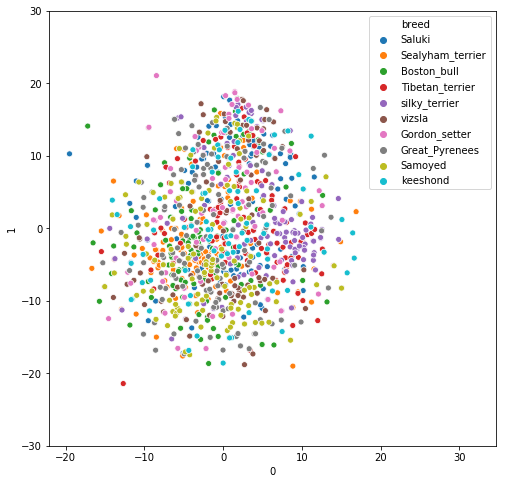

In [65]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)

X_tsne[['breed']] = X_train[['breed']]

y_train = ohe.fit_transform(X_tsne[['breed']])

import seaborn as sns

Y = X_tsne

f = plt.figure(figsize=(8, 8))
    
ax = sns.scatterplot(x=0, y=1, hue="breed",data=X_tsne)
ax.set_ylim(-30,30)


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 131 samples in 0.001s...
[t-SNE] Computed neighbors for 131 samples in 0.010s...
[t-SNE] Computed conditional probabilities for sample 131 / 131
[t-SNE] Mean sigma: 7.766510
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.353928
[t-SNE] KL divergence after 300 iterations: 0.959380
t-SNE done! Time elapsed: 0.45078444480895996 seconds


(-30, 30)

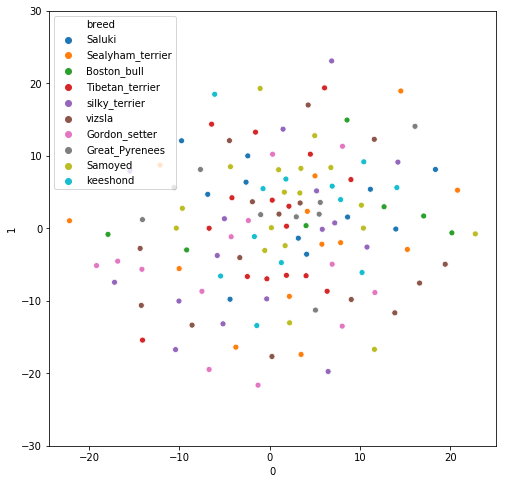

In [66]:
from sklearn.preprocessing import StandardScaler
scl2 = StandardScaler()
X_scaled = scl2.fit_transform(X_test.drop(columns=['breed']))


import time

from sklearn.manifold import TSNE



time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
X_tsne = tsne.fit_transform(X_scaled)

print ('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

X_tsne = pd.DataFrame(X_tsne)

X_tsne.to_csv('X_tsne_' + str(nb_breeds) + '_breeds.csv', index=False)

from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)

X_tsne[['breed']] = X_test[['breed']]

y_test = ohe.fit_transform(X_tsne[['breed']])

import seaborn as sns

Y = X_tsne

f = plt.figure(figsize=(8, 8))
    
ax = sns.scatterplot(x=0, y=1, hue="breed",data=X_tsne)
ax.set_ylim(-30,30)


